# Data Science Cookbook
### Thomas Irwin


This Cookbook is divided into 3 Sections:

1. Data Basics/Cleaning
2. Statistical Information
3. Visualization
4. Example done multiple ways

I will be using the "Adoptable_Pets.csv" which includes data on animals that are ready to be adopted from the Montgomery County Animal Services and Adoption Center in MD. This data is found on data.gov. More information on this dataset can be found [here](https://catalog.data.gov/dataset/adoptable-pets). 


Here are the topics covered in each section:

1. Data Basics/Cleaning 
    
    a. Importing Pandas
    
    b. Reading CSV
    
    c. Print top rows of data (head)
    
    d. Shape of data, number of columns and rows
    
    e. List of all column names
    
    f. Isolating a column
    
    g. Isolating multiple columns
    
    h. Selecting a specific row
    
    i. Selecting consecutive rows
    
    j. Subsetting data on a single condition
    
    k. Subsetting data with two conditions using "and" operator (&)
    
    l. Subsetting data with two conditions using "or" operator (|)
    
    m. Creating a new column in a dataframe
    
    n. Performing a simple merge
    
    o. Using "apply" function to convert to string
    
    p. Using "to_datetime" to convert a string into a date time object 
    
    q. Sorting values
    
    r. Using ".idxmax()" to find the index of a row that has a max value
    
    s. Using ".groupby()" to group by similar values
    
 2. Statistical Information

    a. Using "describe" to produce statistical summaries on number
    
    b. Finding the mean of a column
    
    c. Finding the median of a column
    
    d. Finding the value counts for a column
    
 3. Visualizations
 
     a. Importing matplotlib
     
     b. Creating a histogram
     
     c. Creating a line plot
     
     d. Creating a dot plot
     
     e. Creating a box plot
 
 4. Examples/Combining Techniques - Each Done Two Ways
 
     a. Ex 1: Finding the max value of a column while meeting certain criteria
     
     b. Ex 2: Finding largest difference between two columns 
     
     c. Ex 3: Grouping with Numeric Values
     
     d. Ex 4: Grouping with Datetime Values
     

## Part 1: Data Basics/Cleaning

First, we will understand the basics of a Pandas dataframe and how to navigate it.

In [124]:
#First, import the necessary packages and our dataset. 
#importing pandas as pd
import pandas as pd

In [125]:
#Next, importing our data.
animal_data = pd.read_csv("https://raw.githubusercontent.com/irwintl/DataCookbook/main/Adoptable_Pets.csv")

A pandas dataframe is essentially a table of data, with each column being a variable and each row being an instance. In our example, each row consists of an animal and each column holds information about that animal. A column might hold all animals' names, their respective sizes, or what species they are. 

We can print the first few rows of a dataframe with the ".head()" method. We can also set the number of rows printed by putting a positive integer into the method.

In [126]:
animal_data.head(3)

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
0,A489026,CONFISCATE,03/18/2023,ROSCOE,DOG,5 YEARS,MED,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
1,A504446,RETURN,06/10/2023,ROCKY,OTHER,1 YEAR 1 MONTH,MED,TAN / BLACK,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN


We can also print the shape of the data, which will tell us the number of rows and the number of columns. 

In [127]:
animal_data.shape

(70, 12)

We can print the names of all columns

In [128]:
animal_data.columns

Index(['Animal ID', 'Intake Type', 'In Date', 'Pet name', 'Animal Type',
       'Pet Age', 'Pet Size', 'Color', 'Breed', 'Sex', 'URL Link ',
       'Crossing'],
      dtype='object')

Creating subsets of a pandas dataframe can be very helpful. First, to select a single row you can use the following format:

In [129]:
# data["ColumnName"]
animal_data["Pet name"]

0       ROSCOE
1        ROCKY
2      *SILVER
3         ALEX
4         KOPI
        ...   
65       *HANK
66      CALLIE
67    *NIBBLES
68        *BOB
69        MARS
Name: Pet name, Length: 70, dtype: object

We can also isolate multiple columns:

In [130]:
animal_data[["Pet name", "In Date"]]

,Pet name,In Date
0,ROSCOE,03/18/2023
1,ROCKY,06/10/2023
2,*SILVER,04/25/2023
3,ALEX,05/30/2023
4,KOPI,06/01/2023
...,...,...
65,*HANK,01/06/2023
66,CALLIE,05/04/2023
67,*NIBBLES,01/06/2023
68,*BOB,01/12/2023


Similarly, we can access specific row with the following code:

In [131]:
# we insert an index (kind of like row number) to do this. Here, we are insert 44 as the index.

animal_data.iloc[44]

Animal ID                                                A497842
Intake Type                                            OWNER SUR
In Date                                               05/22/2023
Pet name                                                 PHOENIX
Animal Type                                                  DOG
Pet Age                                                  4 YEARS
Pet Size                                                   LARGE
Color                                                TAN / WHITE
Breed                                            AM PIT BULL TER
Sex                                                            S
URL Link       http://www.petharbor.com/get_image.asp?res=DET...
Crossing                                                     NaN
Name: 44, dtype: object

In [132]:
#Similarly, we can get a set of consecutive rows with the following code:
animal_data.iloc[10:14]

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
10,A505385,OWNER SUR,05/27/2023,MITTENS,CAT,1 YEAR 1 MONTH,MED,DIL TORTIE,DOMESTIC SH,S,http://www.petharbor.com/get_image.asp?res=DET...,NaN
11,A483605,OWNER SUR,05/05/2023,MOZART,CAT,9 YEARS,MED,BRN TABBY,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
12,A505098,OWNER SUR,05/20/2023,CHIEF,DOG,1 YEAR 1 MONTH,LARGE,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
13,A406310,CONFISCATE,03/18/2023,CHARLIE,DOG,7 YEARS,MED,WHITE / BROWN,AM PIT BULL TER / BOXER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN


We can also subset the data to select instances which meet certain properties. For example, if we want the data of only the cats, we can use the following code:

In [133]:
# the format is:
# data[data["ColumnName"] = Desired Value]

cats = animal_data[animal_data["Animal Type"] == "CAT"]
cats.head(3)

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
3,A505490,OWNER SUR,05/30/2023,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
10,A505385,OWNER SUR,05/27/2023,MITTENS,CAT,1 YEAR 1 MONTH,MED,DIL TORTIE,DOMESTIC SH,S,http://www.petharbor.com/get_image.asp?res=DET...,NaN


We can also use "or" and "and" to subset on various conditions:

In [134]:
# using "and" to subset on 2 conditions

black_cats = animal_data[(animal_data["Animal Type"] == "CAT") & (animal_data["Color"] == "BLACK")]
black_cats.head()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
3,A505490,OWNER SUR,05/30/2023,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
66,A301283,OWNER SUR,05/04/2023,CALLIE,CAT,17 YEARS,SMALL,BLACK,DOMESTIC SH,S,http://www.petharbor.com/get_image.asp?res=DET...,NaN


In [135]:
# using "or" operator
black_or_cat = animal_data[(animal_data["Animal Type"] == "CAT") | (animal_data["Color"] == "BLACK")]
black_or_cat.head()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
3,A505490,OWNER SUR,05/30/2023,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
10,A505385,OWNER SUR,05/27/2023,MITTENS,CAT,1 YEAR 1 MONTH,MED,DIL TORTIE,DOMESTIC SH,S,http://www.petharbor.com/get_image.asp?res=DET...,NaN
11,A483605,OWNER SUR,05/05/2023,MOZART,CAT,9 YEARS,MED,BRN TABBY,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN
14,A505475,OWNER SUR,05/30/2023,VINNIE,CAT,13 YEARS,LARGE,GRAY / WHITE,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN


Next, we will learn to merge two datasets. As an example, I will create a new pandas dataframe called "Cute_data". This will have two columns, the Animal ID and "Cute Rating" which will be a random value from 1 to 10. 

In [136]:
#code used to create Cute Rating
import numpy as np

Cute_data = pd.DataFrame()

#Here is how you create a new column
Cute_data["Animal ID"] = animal_data["Animal ID"]
#creates a random number from 0 to 10.
Cute_data["Cute Rating"] = np.random.uniform(low = 0, high = 10, size=(len(Cute_data),))


In [137]:
Cute_data.shape

(70, 2)

In [138]:
Cute_data.head()

,Animal ID,Cute Rating
0,A489026,0.512468
1,A504446,0.923166
2,A501998,6.000645
3,A505490,3.352689
4,A505200,2.845946


Next, we will merge the Cute_data and the original data to create a new dataframe that includes all columns. In this case it is clear we could have built the Cute Rating into our original, but there will be times when we want to merge datasets from various sources.  

In [139]:
#There are various types of merges, each with its own benefits depending on context. Here is the simplest form of merge
all_data = animal_data.merge(Cute_data, on = "Animal ID")

In [140]:
all_data.head()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing,Cute Rating
0,A489026,CONFISCATE,03/18/2023,ROSCOE,DOG,5 YEARS,MED,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.512468
1,A504446,RETURN,06/10/2023,ROCKY,OTHER,1 YEAR 1 MONTH,MED,TAN / BLACK,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.923166
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,6.000645
3,A505490,OWNER SUR,05/30/2023,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,3.352689
4,A505200,RETURN,06/01/2023,KOPI,DOG,2 YEARS,LARGE,BROWN / WHITE,GERM SHEPHERD / LABRADOR RETR,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,2.845946


As we can see, this is basically our previous data with the addition of Cute Rating. The final thing we will do with this dataset is formatting types. For example, our "In Date" variable is likely defaulted to a string instead of a DateTime variable. 

In [141]:
all_data["In Date"] = all_data["In Date"].apply(str)

In [142]:
all_data.head()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing,Cute Rating
0,A489026,CONFISCATE,03/18/2023,ROSCOE,DOG,5 YEARS,MED,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.512468
1,A504446,RETURN,06/10/2023,ROCKY,OTHER,1 YEAR 1 MONTH,MED,TAN / BLACK,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.923166
2,A501998,RETURN,04/25/2023,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,6.000645
3,A505490,OWNER SUR,05/30/2023,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,3.352689
4,A505200,RETURN,06/01/2023,KOPI,DOG,2 YEARS,LARGE,BROWN / WHITE,GERM SHEPHERD / LABRADOR RETR,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,2.845946


In [143]:
all_data["In Date"] = pd.to_datetime(all_data["In Date"], format='%m/%d/%Y')


In [144]:
all_data.head()

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing,Cute Rating
0,A489026,CONFISCATE,2023-03-18,ROSCOE,DOG,5 YEARS,MED,BROWN / WHITE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.512468
1,A504446,RETURN,2023-06-10,ROCKY,OTHER,1 YEAR 1 MONTH,MED,TAN / BLACK,GUINEA PIG,M,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.923166
2,A501998,RETURN,2023-04-25,*SILVER,CAT,10 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,6.000645
3,A505490,OWNER SUR,2023-05-30,ALEX,CAT,6 YEARS,MED,BLACK,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,3.352689
4,A505200,RETURN,2023-06-01,KOPI,DOG,2 YEARS,LARGE,BROWN / WHITE,GERM SHEPHERD / LABRADOR RETR,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,2.845946


Converting to datetime will be essential for plotting the data points over time. 

We can also sort values with this code:

In [145]:
temp = all_data.sort_values('In Date')


We can use ".idxmax()" to find the row index for row that has the maximum of a certain value.

In [146]:
max_cute_index = all_data['Cute Rating'].idxmax()

max_cute_animal = all_data.loc[max_cute_index]

In [147]:
max_cute_animal

Animal ID                                                A505475
Intake Type                                            OWNER SUR
In Date                                      2023-05-30 00:00:00
Pet name                                                  VINNIE
Animal Type                                                  CAT
Pet Age                                                 13 YEARS
Pet Size                                                   LARGE
Color                                               GRAY / WHITE
Breed                                                DOMESTIC SH
Sex                                                            N
URL Link       http://www.petharbor.com/get_image.asp?res=DET...
Crossing                                                     NaN
Cute Rating                                              9.96651
Name: 14, dtype: object

The function ".groupby()" will group each observation based on similar values. For example, if you wanted to work with each group of colors for the animals, you can use the following code:

In [148]:
colors = all_data.groupby("Color")


## Statistical Information

Next, we will produce some statistical information regarding the data. 

In [149]:
#this will produce numerical summaries for all variables that can (here we only have cute rating as a number,
# everything else is a string or date)

all_data.describe()

,Cute Rating
count,70.000000
mean,4.639006
std,3.069703
min,0.053348
25%,2.313421
50%,4.646002
75%,6.850034
max,9.966510


In [150]:
# We can also select the mean, median, etc for any column. We will again use Cute Rating as it is the only number

cute_mean = all_data["Cute Rating"].mean()

In [151]:
cute_median = all_data["Cute Rating"].median()

We can also do this for our datetime variable:

In [152]:
all_data['In Date'].describe()

/var/folders/3c/ym9wm9791bl1c1zqjtv5fgdw0000gn/T/ipykernel_47540/892692325.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data['In Date'].describe()


count                      70
unique                     43
top       2023-05-30 00:00:00
freq                        5
first     2023-01-06 00:00:00
last      2023-06-14 00:00:00
Name: In Date, dtype: object

In [153]:
all_data['In Date'].mean()

Timestamp('2023-04-22 13:01:42.857142784')

In [154]:
all_data['In Date'].median()

Timestamp('2023-05-09 00:00:00')

Next, we can create a frequency table for our categorical variables:

In [155]:
all_data["Animal Type"].value_counts()

OTHER        28
DOG          24
CAT          17
LIVESTOCK     1
Name: Animal Type, dtype: int64

## Visualization

Next, we will produce some basic visualizations with the data using matplotlib. 


In [156]:
#import the visualization package
from matplotlib import pyplot as plt


Here is code to produce a histogram.

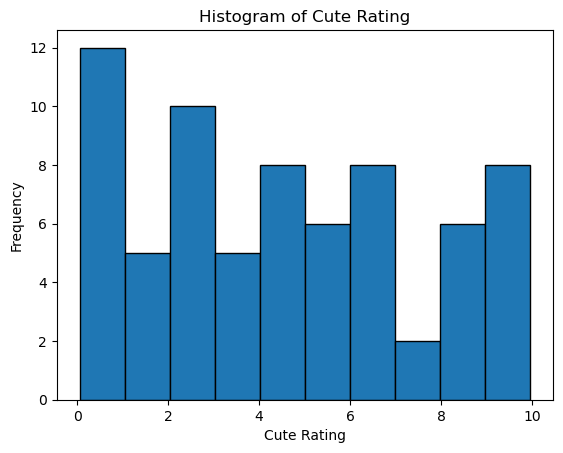

In [157]:
plt.hist(all_data['Cute Rating'], bins=10, edgecolor='black')

plt.title('Histogram of Cute Rating')
plt.xlabel('Cute Rating')
plt.ylabel('Frequency')

plt.show()

To create a line graph:

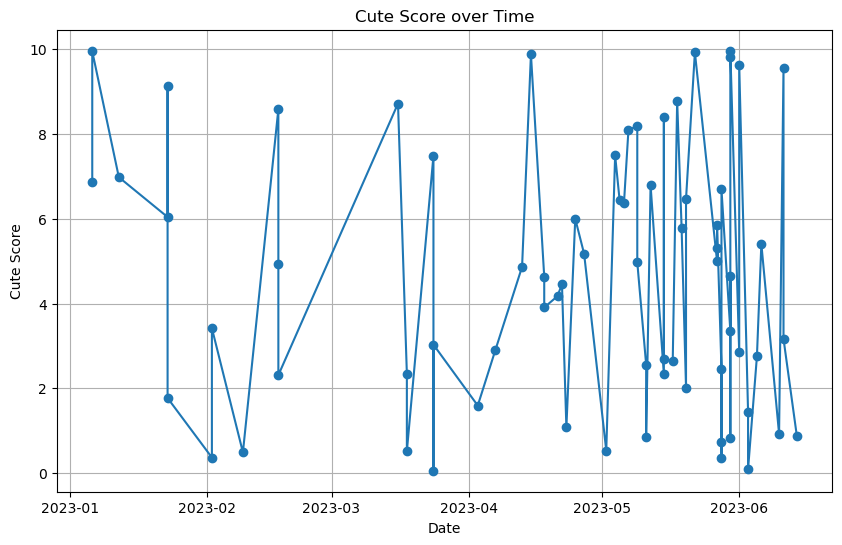

In [158]:
temp = all_data.sort_values('In Date')

plt.figure(figsize=(10, 6))
plt.plot(temp['In Date'], temp['Cute Rating'], marker='o')
plt.title('Cute Score over Time')
plt.xlabel('Date')
plt.ylabel('Cute Score')
plt.grid(True)
plt.show()

To do additional graphs, I will create another numerical variable called "Family Friendly Score" which will also be out of 10.

In [159]:
all_data["Family Friendly Score"] = np.random.uniform(low = 0, high = 10, size=(len(all_data),))


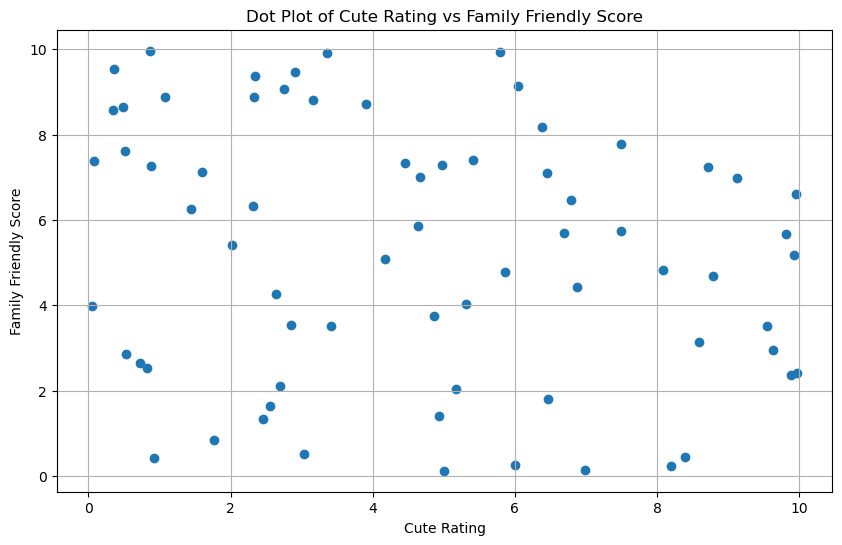

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(all_data['Cute Rating'], all_data['Family Friendly Score'])
plt.title('Dot Plot of Cute Rating vs Family Friendly Score')
plt.xlabel('Cute Rating')
plt.ylabel('Family Friendly Score')
plt.grid(True)
plt.show()

We can also use matplotlib to create box plots:

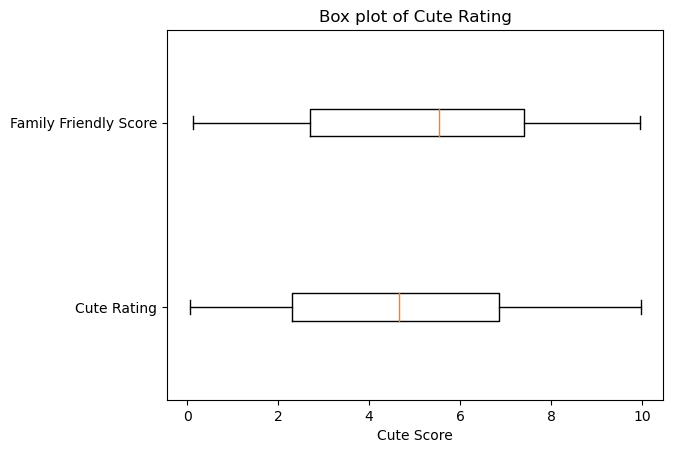

In [161]:
fig, ax = plt.subplots()

#create box plots
bp1 = ax.boxplot(all_data['Cute Rating'], vert=False, positions=[1])
bp2 = ax.boxplot(all_data['Family Friendly Score'], vert=False, positions=[2])


#set labels
ax.set_xlabel('Cute Score')
ax.set_title('Box plot of Cute Rating')

ax.set_yticks([1, 2])
ax.set_yticklabels(['Cute Rating', 'Family Friendly Score'])


plt.show()

Note: because these are random values, the actual box plots aren't interesting.

### Examples with 2 methods:



#### Example 1:
Use two different methods to find the name and information of the animal is the most family friendly and scored at least 5 on the cute rating.

1. Method 1: Sort values, head(1)

This method uses the sort_values function to sort all of animals and then prints the information for the first animal on the list. 

In [162]:
cute5 = all_data[all_data["Cute Rating"] > 5]

cute5 = cute5.sort_values("Family Friendly Score", ascending = False)

print(cute5["Pet name"])

41          MILO
25       WENDIGO
43         *BOBY
66        CALLIE
28         *LILI
15          BOMA
11        MOZART
9     MAPINGAUTI
65         *HANK
26       LINCOLN
47        *MONTY
55        *CRUSH
54        *ERNIE
44       PHOENIX
16         *SARA
7          ROSIE
27          NEKO
67      *NIBBLES
10       MITTENS
58         JENNY
35          *MAX
45        *RINGO
14        VINNIE
69          MARS
18        SUMMER
61          *UNO
63     HASHBROWN
2        *SILVER
22       *CARONA
68          *BOB
39          HANK
Name: Pet name, dtype: object


We can see that the name of the animal with the highest family friendly score that is at least 5 on the cute rating is named Tank. This will change each time the entire code is ran because the the variables are random. 

We can also print the entire row of information about Tank:

In [163]:
cute5.head(1)

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing,Cute Rating,Family Friendly Score
41,A505071,OWNER SUR,2023-05-19,MILO,CAT,8 YEARS,MED,BROWN / WHITE,DOMESTIC SH,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,5.792713,9.937907


2. Method 2: Index of Family Friendly

This method uses the function ".idxmax()" to find the index of the animal that has the maximum value for a given column. 

In [164]:
cute5_2 = all_data[all_data["Cute Rating"] > 5]

max_fam_id = cute5_2['Family Friendly Score'].idxmax()

info_max_fam = cute5_2.loc[max_fam_id]



In [165]:
info_max_fam

Animal ID                                                          A505071
Intake Type                                                      OWNER SUR
In Date                                                2023-05-19 00:00:00
Pet name                                                              MILO
Animal Type                                                            CAT
Pet Age                                                            8 YEARS
Pet Size                                                               MED
Color                                                        BROWN / WHITE
Breed                                                          DOMESTIC SH
Sex                                                                      N
URL Link                 http://www.petharbor.com/get_image.asp?res=DET...
Crossing                                                               NaN
Cute Rating                                                       5.792713
Family Friendly Score    

#### Example 2:

Find the information of the animal who has the biggest gap between their Cute Rating and Family Friendly Score.

1. Method 1: Creating a new column

The benefit of this method is that it is the simplest to execute.

In [166]:
disp = all_data
disp["Difference"] = abs(disp["Cute Rating"] - disp["Family Friendly Score"])
disp = disp.sort_values("Difference", ascending = False)

disp.head(2)

,Animal ID,Intake Type,In Date,Pet name,Animal Type,Pet Age,Pet Size,Color,Breed,Sex,URL Link,Crossing,Cute Rating,Family Friendly Score,Difference
59,A500853,OWNER SUR,2023-02-02,MAXIMILIAN,DOG,8 YEARS,LARGE,BRINDLE,AM PIT BULL TER,N,http://www.petharbor.com/get_image.asp?res=DET...,NaN,0.364240,9.529469,9.165229
49,A504752,STRAY,2023-05-11,CASSIDY,CAT,1 YEAR 7 MONTHS,MED,BLACK / WHITE,DOMESTIC SH,S,http://www.petharbor.com/get_image.asp?res=DET...,"3300 CASTLE RIDGE CIR, SILVER SPRING MD 20904",0.858899,9.963378,9.104479


Method 2: Using a custom function

A benefit of this is that it doesn't create an additional column. It also can be used multiple times for different columns/data sets. 

In [167]:
def find_biggest_difference(data, Column1, Column2):
    #takes the data and the two column names. Both should be numbers
    #returns the row of the value with the largest difference
    df = pd.DataFrame()
    df['Difference'] = abs(data[Column1] - data[Column2])
    return data.iloc[df["Difference"].idxmax()]

biggest_diff = find_biggest_difference(all_data, "Cute Rating", "Family Friendly Score")

print(biggest_diff)

Animal ID                                                          A500853
Intake Type                                                      OWNER SUR
In Date                                                2023-02-02 00:00:00
Pet name                                                        MAXIMILIAN
Animal Type                                                            DOG
Pet Age                                                            8 YEARS
Pet Size                                                             LARGE
Color                                                              BRINDLE
Breed                                                      AM PIT BULL TER
Sex                                                                      N
URL Link                 http://www.petharbor.com/get_image.asp?res=DET...
Crossing                                                               NaN
Cute Rating                                                        0.36424
Family Friendly Score    

#### Example 3:

What is the average cute rating for each size of animal?

Method 1: Creating three new data sets, finding the mean from that:

In [168]:
toy = all_data[all_data["Pet Size"] == "TOY"]
small = all_data[all_data["Pet Size"] == "SMALL"]
medium = all_data[all_data["Pet Size"] == "MED"]
large = all_data[all_data["Pet Size"] == "LARGE"]

print("Toy cute average: " + str(toy["Cute Rating"].mean()))
print("Small cute average: " + str(small["Cute Rating"].mean()))
print("Medium cute average: " + str(medium["Cute Rating"].mean()))
print("Large cute average: " + str(large["Cute Rating"].mean()))

Toy cute average: 3.288726777100676
Small cute average: 5.657994726785849
Medium cute average: 4.206318485053881
Large cute average: 4.957369626394721


Method 2: Group by function

In [169]:
all_data.groupby("Pet Size")["Cute Rating"].mean()

Pet Size
LARGE    4.957370
MED      4.206318
SMALL    5.657995
TOY      3.288727
Name: Cute Rating, dtype: float64

#### Example 4

We will see if the median intake date for each animal type is different. 

Method 1: median of new data sets

In [170]:
cat = all_data[all_data["Animal Type"] == "CAT"]
dog = all_data[all_data["Animal Type"] == "DOG"]
livestock = all_data[all_data["Animal Type"] == "LIVESTOCK"]
other = all_data[all_data["Animal Type"] == "OTHER"]

print("Cat median intake date: " + str(cat["In Date"].median()))
print("Dog median intake date: " + str(dog["In Date"].median()))
print("Livestock median intake date: " + str(livestock["In Date"].median()))
print("Other median intake date: " + str(other["In Date"].median()))

Cat median intake date: 2023-05-15 00:00:00
Dog median intake date: 2023-05-10 00:00:00
Livestock median intake date: 2023-02-09 00:00:00
Other median intake date: 2023-05-04 00:00:00


Method 2: Group by

In [171]:
all_data.groupby("Animal Type")["In Date"].median()

Animal Type
CAT         2023-05-15
DOG         2023-05-10
LIVESTOCK   2023-02-09
OTHER       2023-05-04
Name: In Date, dtype: datetime64[ns]